# Lab2 - Drop Out & Start Up (Cloud Data Insurance)


#### Authors:

v1.0 (2014 Fall) Rishi Sharma \*\*\*, Sahaana Suri \*\*\*, Kangwook Lee \*\*\*, Kannan Ramchandran \*\*\*   
v1.1 (2015 Fall) Kabir Chandrasekher \*\*, Max Kanwal \*\*, Kangwook Lee \*\*\*, Kannan Ramchandran \*\*\*  
v1.2 (2016 Spring) Ashvin Nair \*, Kabir Chandrasekher \*\*, Kangwook Lee \*\*\*, Kannan Ramchandran \*\*\*

Your best friend Ben Bitdiddle is convinced he's got a great new start up idea that's going to change the world. He's encouraging you to drop out and start the new company `Bitdiddlers, Inc.` with him. Before joining his start up, you'll want to do some analysis of your own to make sure his ideas are sound.

`Bitdiddlers, Inc.` will be a company in cloud data storage, which is already a pretty crowded field (Dropbox, Box, Google, Microsoft, Amazon, etc.), so you are understandably skeptical. However, there is one wrinkle to Ben's business model which he claims will help lower costs and **#disrupt** the current cloud storage model.

One thing that drives up the cost for cloud storage companies is ensuring that customer data is not lost. You never hear about Dropbox losing your presentation, or Facebook losing your photos from that bachelor party (even though you may want them to), or really any instances of customer data loss associated with cloud storage services. This is because storage companies incur an enormous overhead of replicating customer data many, many times over in order to ensure an extremeley low probability of data loss.

Ben Bitdiddle has decided that this expectation of 100% data integrity is increasingly unreasonable as humanity transitions deeper into a digital era. Digital goods, not unlike physical goods, are prone to permanent loss. Thus, Ben has taken inspiration from insurance companies, which help mitigate the pain of financial loss usually resulting from lost earning potential, goods, crops, shelter, etc.. Rather than promise 100% data integrity, which drives up costs and is inevitably a promise that cloud storage companies **will** be forced to break, Ben proposes that `Bitdiddlers, Inc.` will break ground in the new frontier of Cloud Data Insurance.

<center><img src="http://i.imgur.com/7kOzRHy.png" alt="Data Insurance" style="width: 600px;"></center>

## Insurance Model

The basic premise of insurance is that customers pay a premium $p$ in order to insure their goods of value $v$ (in this instance, goods = data). In most cases, these goods remain unharmed (data remains secure), so the insurer happily pockets this premium from customers. In a small subset of cases, customer goods are damaged or lost (data is corrupted) and insurers must pay the customer the value $v$ of the goods that were lost. In order for the business to be profitable over the course of a year, the sum over all customer premiums must be larger than the costs of paying customers for lost goods plus the costs of operation.

Let's formalize this idea in terms of the problem at hand. We will make several simplifying assumptions in order to get a cursory look at the problem, rather than explore all of its intricate complexities. The purpose will be to make a back-of-the-hand evaluation of the business. In order to truly evaluate the opportunity, the model would have to be thoroughly refined, but the skeleton given is not a bad place to start.

### Insurance Equation:

We first define the following variables.

$E$: annual profit

$P$: total annual premium = sum of all premiums charged to all customers per year

$L$: total loss incurred in one year (total payout to customers with lost data)

$U$: total expenses incurred in one year

Then, the following equation holds. 

$\Large E = P - L - U$

### Replicating Data

You will replicate each customer's data $r$ times, with each copy to be stored on a different disk to protect against failures. Costs will increase as $r$ increases, but the number of people who end up using their coverage will decrease (because data will be less likely to fail). You will see in this lab that $r$ is a business model parameter that you will tune.

For simplicity, we assume the following:

1. All of your (N) customers store data of size $10$GB. From this point on, the stored data will be referred to as the customer's "file". The company will be storing the files on a system of several 1 TB hard disks, each of which costs \$100. Since \$100/TB = 10 ${\mathrm{c}\mkern-6mu{\mid}}$ /GB, the total cost per customer $C=  \$1$. Thus, we have that $\large U = r N C$. We ignore all other operating costs in this model.

2. All customer data is valued at $V =$ $\$10000$. Total loss is a random variable depending on number of customers who lose data $X$. Thus, we have that $\large L = VX$

3. $N$ customers are willing to pay an annual premium of $P_0=\$10$. Thus, the total annual premium is $\large P = NP_0 = 10N $

$\Large E = P - L - U = NP_0 - rNC - VX$

## Data Loss Model

Let us assume an exceedingly simple model for data loss. Let us say that each disk has an I.I.D probability of failure of $p = 0.01$ on each day. At the end of each day, all disks that have failed are replaced. All content on those failed disks is replaced by a replica of that content.

Suppose you have a file on $r$ disks. If one disk with your file fails on the first day, one of the $r-1$ replicas of the file will be used to restore the file on a replacement disk for the failed disk. You will lose your file if all $r$ disks fail on any given day. 

In [2]:
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
from __future__ import division
%matplotlib inline

## <font color=blue>$\mathcal{Q}1.$ Disk Failures</font>

### <font color=blue>a. Find the probability of losing a file within a year if the file is stored in $r$ different disks. Each disk fails with probability $p = .01$ on each day, and all data on all disks is restored at the end of each day if possible (i.e. at least one disk has not failed).</font>

Losing a file on any given day is if all r disks are corrupted in a single day. The probability of this is P(disk_1 fails)P(disk_2 fails) ... P(disk_r fails) = 0.01^r

Then, out of 365 days, probability of failure is 1-P(success). Success is if nothing fails all 365 days. This is just (1 - 0.01^r)^365.

That makes P(failure) = 1 - (1 - 0.01^r)^365

### <font color=blue>b. Now plot the analytic expression you obtained from part (a) over the range of $r \in \{1,...,6\}$. Some starter code is provided.<font>

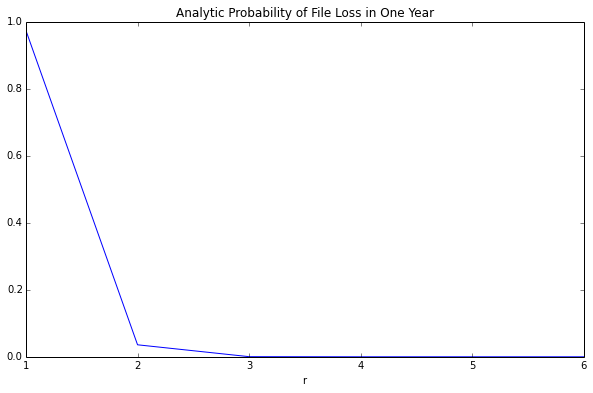

In [13]:
# Solution here
p = 0.01
r_values = np.r_[1:7]
fig = plt.figure(figsize=(10,6))
p_loss_analytic = [1 - ((1 - (p ** r)) ** 365) for r in r_values]
plt.plot(r_values, p_loss_analytic)
plt.xlabel('r')
plt.title('Analytic Probability of File Loss in One Year')

### <font color=blue>c. Write a script to simulate the scenario described in part (a) for the same $r$ values at part (b). One trial is a simulation of one full year of disk failures. For each value of $r$, run 1000 trials to approximately determine the probability of losing a file in one year. Do your simulated results match what you expected based on analysis? Plot both the analytic probability and simulated probability on the same graph. <font>

In [14]:
# Solution here
r_values = np.r_[1:7]
p = 0.01
k = 1000 # number of trials for each value of r
n = 1000 # number of customers

p_loss_simulated = []
for r in r_values:
    numFailures = 0
    for trial in xrange(k):
        failed = False
        for i in xrange(365):
            numFailed = 0
            for disk in range(r):
                if(np.random.uniform() <= p):
                    numFailed += 1
            if numFailed == r:
                failed = True
        if(failed):
            numFailures += 1
    p_loss_simulated.append(numFailures / (float)(k))
            

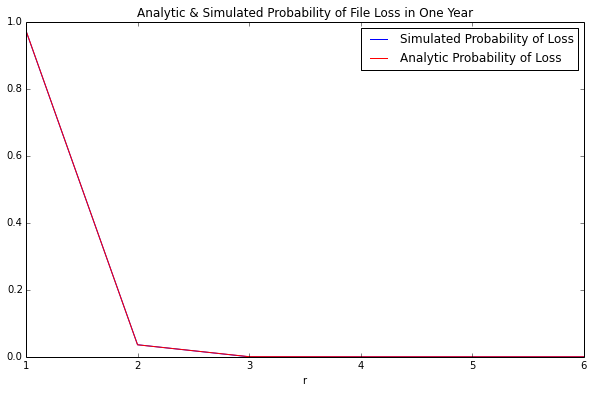

In [17]:
# Plotting Code
fig = plt.figure(figsize=(10,6))
plt.plot(r_values, p_loss_simulated, 'blue')
plt.plot(r_values, p_loss_analytic, 'red')
plt.xlabel('r')
plt.legend(('Simulated Probability of Loss','Analytic Probability of Loss'))
plt.title('Analytic & Simulated Probability of File Loss in One Year')

## <font color=blue>$\mathcal{Q}2.$ What do you expect?</font>

### <font color=blue>a. What is $\mathbb{E}[X]$, the expected number of customers who will lose their file per year? Remember, there are $N$ total customers</font>.

2a. Since it's a binomial distribution, we know that the expected value is the probability of success * number of trials. We already found p, and number of "trials" are the number of customers, which is N.

E[X] = N(1 - (1 - 0.01^r)^365)

### <font color=blue>b. What is your expected profit per customer, or $\frac{\mathbb{E}[E]}{N}$? Simplify as much as possible.</font>

2b. E = P − L − U = NP_0 − rNC − VX
    E = 10N - rN - 10000X
    E/N = 10 - r - 10000(1 - (1 - p^r)^365) (Because of linearity of expectation)

### <font color=blue>c. Plot $\frac{\mathbb{E}[E]}{N}$, the analytic expression from part (b), as a function of $r$. Here you can plot values for $r \in \{3,...,6\}$ (you will notice that for $r=1$ or $r=2$, we are expected to lose a lot of money per customer).</font>

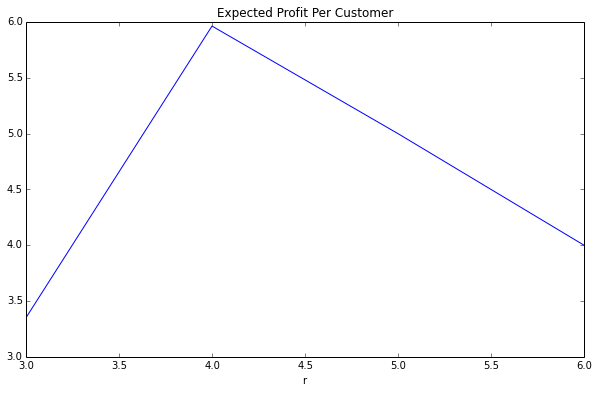

In [21]:
p = 0.01
r_values = np.r_[3:7]
fig = plt.figure(figsize=(10,6))
p_profit = [10 - r - 10000*(1 - (1 - p**r)**365) for r in r_values]
plt.plot(r_values, p_profit)
plt.xlabel('r')
plt.title('Expected Profit Per Customer')

### <font color=blue>d. Given the results you see, what is the optimal number of times you should replicate customer data to maximize profit per customer? </font>

2d. 4 times

## Beyond 'Average'

Is an 'average'-based calculation enough? For example, which of the following two scenarios sounds better to you?

- Make \$1,000 with probability 1
- Make \$1,000,000 with probability 0.002 and lose \$1,000 with probability 0.998

I bet most of you would prefer the first option to the second option. However, if you take a look at the expected profits of two options, you will find the following results.

- E[profit option 1] = \$1,000
- E[profit option 2] = \$1,000,000 $\times$ 0.002 - \$1000 $\times$ 0.998 = \$1,002

This example illustrates that one should consider more than just the average profit when designing a policy. One thing you definitely should consider is the probability of bankruptcy. Let us model bankruptcy as the event where you lose money in your first year of operation and are forced to shut your business down. While this measure obviously isn't perfect (Twitter still doesn't turn a profit), it's not a bad indicator of failure for an insurance company, which are expected to turn a profit relatively early on.

## <font color=blue>$\mathcal{Q}3.$ Funding Runs Dry </font>

### <font color=blue>a. What is the probability of your company becoming bankrupt as a function of $r$? You go bankrupt if $E < 0$ at the end of the year. Express your answer in the form of $P(X > \text{something})$.</font>

3a. 10N − rN − 10000X < 0
    (10N-rN)/10000 < X
    
    = P(X > (10N-rN)/10000)

### <font color=blue>b. Explain why it is difficult to calculate this value $P(X > \text{something})$ exactly. Also, explain why it was easy to calculate $\mathbb{E}[X]$ in $\mathcal{Q}2$a. More precisely, what makes one of these values difficult to calculate and the other easy to calculate?</font>

3b. It was easy to calculate in Q2a because there was an obvious closed form solution to it because of the Binomial Theorem. However, for some arbitrary sum of values, it's difficult to get a clean closed-form solution.

## Useful Bounds

Later in the course, we will study bounding and dealing with expressions like $P(X > \text{something})$ in more detail.  For now, we will try to give a coarse bound on our chance of bankruptcy.

### Markov Bound
For any *non-negative* random variable $Z$, we have: 
$$P[Z \ge a] \le \frac{E[Z]}{a}$$

In general, others bounds will be stronger and we will cover these in detail later in the course.

### <font color=blue>c. Use Markov's inequality to put an upper bound of the probability of bankruptcy. Then plot this bound for $r \in \{3, 4, 5, 6\}$. Does your earlier choice for $r$ still seem like a good bet?
</font>

3c. Yes, 4 is still a pretty low upper bound for the probability of failure, as opposed to the > 0.5 that r=3 has.

In [35]:
# use variables below as needed

r_values = np.array(range(3,7))
N = 1000.0
p = 0.01
q = 1-p

V = 10**4
P0 = 10
C = 1.0


## E = P - L - U = NP_0 - rNC - VX$
## N(1 - (1 - 0.01^r)^365) / ((10N-rN)/10000)

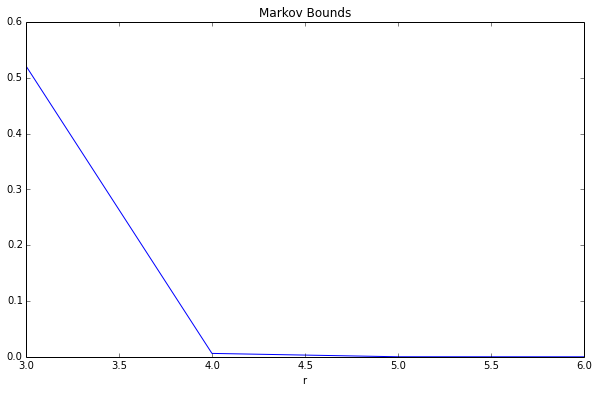

In [38]:
# Solution here
fig = plt.figure(figsize=(10,6))
markov_bound = [N * (1 - ((1 - (p ** r)) ** 365)) / ((10*N-r*N)/10000) for r in r_values]
plt.plot(r_values, markov_bound)
plt.xlabel('r')
plt.title('Markov Bounds')

### <font color=blue>d. Build a full simulator: you should start with $N$ customers' data stored on day $0$, and simulate disk failures and data repair for 365 days. Simulate a year $100$ times for different values of $r$. Plot the results of the simulation for $r \in \{3, 4, 5, 6\}$ along with Markov bound.
</font>

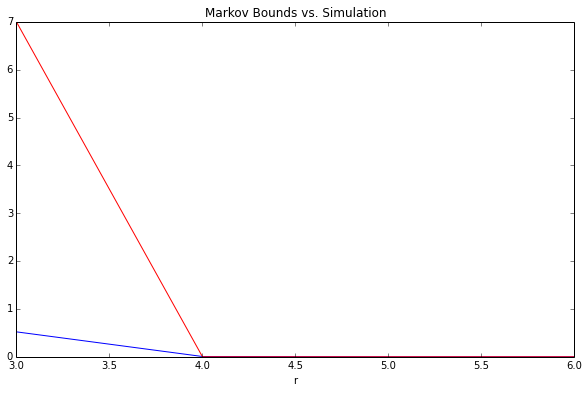

In [66]:
def sublistExists(list1, list2):
    return ''.join(map(str, list2)) in ''.join(map(str, list1))

#0-99 => Disks 0-(r-1)
#100-199 => Disks r-(2r-1)
#...
#900-999 => Disks 9r-(10r-1)

N = 1000
trials = 100
p = 0.01
r_vals = np.array(range(3,7))
results = []
for r in r_vals:
    numCustomersLost = 0
    for trial in xrange(trials):
        disks = [[] for i in range((int)(N * r / 100))]
        for person in xrange(N):
            div = (int)(person / 100)
            for d in xrange(div*r, (div+1)*r):
                disks[d].append(person)
        
        for day in xrange(365):
            disks_lost = []
            for i in range(len(disks)):
                if (np.random.uniform() <= p):
                    disks_lost.append(i)
            for r_possible in xrange(10):
                if(sublistExists(disks_lost, range(r_possible*r, (r_possible+1)*r))):
                    numCustomersLost += 100
    results.append(numCustomersLost / (float)(trials))

    

fig = plt.figure(figsize=(10,6))
markov_bound = [N * (1 - ((1 - (p ** r)) ** 365)) / ((10*N-r*N)/10000) for r in r_values]
plt.plot(r_values, markov_bound, 'blue')
plt.plot(r_values, results, 'red')
plt.xlabel('r')
plt.title('Markov Bounds vs. Simulation')


    

In the upcoming weeks of the course, we'll look at bounding probabilities of this nature, at which point we'll be able to do more to analyze our probability of going bankrupt. Wrestling with them and visualizing them before diving into the theory will give you a better feel and intuition for what these bounds can be used for and how good each one can be.  We encourage you to play around with them! For now, we can be happy with the understanding above, which is essentially saying we can afford to lose one file for every \$10,000 ($V$) in revenue we generate.

## Where do we go from here?

We made several assumptions while building our model to simplify the analysis and fixed several parameters that need not have been fixed. Nevertheless, we ended up with an optimal number of replications $r$ which is very similar to industry standard. Thus, it is unlikely that this business would succeed if you used the parameters specified. The next step in analysis would be to try to increase premiums or decrease insurance payouts to end up with a more viable business.

___
___
___

<font color='green' size=5> In case you are unconvinced that cloud data insurance is a very real start up idea and think that the course staff is just blowing smoke in order to ask probability questions, you can educate yourself by reading this <a href='http://www.forbes.com/sites/reuvencohen/2013/04/24/new-cloud-computing-insurance-trys-to-solve-cloud-liability-concerns-for-service-providers/'>article</a> and looking at some of the <a href='http://www.cloudinsure.com/'>startups</a> and <a href='http://www.mspalliance.com/membership/cloud-msp-insurance/'>big players</a> getting involved in the area.</font>

$$$$

<font size=1> By submitting this lab you are agreeing that if you start a company based on any of the ideas presented in this lab, the course staff is entitled to 10% equity in preferred shares. This agreement is in the nature of comic relief, and bears no legal value in any way whatsoever. If you are to start a company, however, please name it `Bitdiddlers, Inc.` to honor the course staff, who are all well reputed diddlers of the bits</font>

## References

[1] D. Ford, F. Labelle, F. Popovici, M. Stokely, V.-A. Truong,
L. Barroso, C. Grimes, and S. Quinlan. Availability in globally
distributed storage systems. In OSDI, 2010